In [77]:
import numpy as np
import random
import tsplib95
import matplotlib.pyplot as plt

def get_distance(node1, node2, problem):
    # Access the coordinates or other relevant data for node1 and node2
    coord1 = problem.node_coords[node1]
    coord2 = problem.node_coords[node2]

    # Calculate distance based on your specific requirements
    # Example: Euclidean distance calculation
    distance = np.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)
    return distance

problem = tsplib95.load_problem('/Users/hanyfaltaos/Downloads/NeuoralSub/A4/tsplib95-master/archives/problems/tsp/att48.tsp',special=get_distance)



/var/folders/zr/0jj11rzn1m70682xsp91vxj00000gn/T/ipykernel_2074/1482610138.py:16: DeprecationWarning: Call to deprecated function (or staticmethod) load_problem. (Will be removed in newer versions. Use `tsplib95.load` instead.) -- Deprecated since version 7.0.0.
  problem = tsplib95.load_problem('/Users/hanyfaltaos/Downloads/NeuoralSub/A4/tsplib95-master/archives/problems/tsp/att48.tsp',special=get_distance)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/hanyfaltaos/Downloads/NeuoralSub/A4/tsplib95-master/archives/problems/tsp/att8.tsp'

In [ ]:
def create_tour(cities):
    return random.sample(cities, len(cities))

def initial_population(size, cities):
    return [create_tour(cities) for _ in range(size)]

def calculate_distance(tour, problem):
    return sum(problem.get_weight(tour[i], tour[i + 1]) for i in range(len(tour) - 1))

def fitness(tour, problem):
    return 1 / calculate_distance(tour, problem)



In [ ]:
#This function performs a selection process similar to a roulette wheel. 
def roulette_wheel_selection(population, fitness_func):
    total_fitness = sum(fitness_func(individual) for individual in population)
    pick = random.uniform(0, total_fitness)
    current = 0
    for individual in population:
        current += fitness_func(individual)
        if current > pick:
            return individual
#This function performs a crossover operation between two parents to create two children (routes in  TSP problem).
#  It's called "uniform" because each gene (city) from the parents has a 50% chance of being swapped between the children.
def uniform_crossover(parent1, parent2):
    # Initialize two children as empty lists
    child1, child2 = [], []
    
    # Fill the children with None to establish structure
    for _ in range(len(parent1)):
        child1.append(None)
        child2.append(None)

    # Decide randomly which genes to swap from each parent to each child
    for i in range(len(parent1)):
        if random.random() < 0.5:
            child1[i] = parent1[i]
            child2[i] = parent2[i]
        else:
            child1[i] = parent2[i]
            child2[i] = parent1[i]


    return child1, child2

def inversion_mutation(tour, mutation_rate):
    if random.random() < mutation_rate:
        i, j = sorted(random.sample(range(len(tour)), 2))
        tour[i:j] = reversed(tour[i:j])
    return tour


Stationary state reached at generation 16


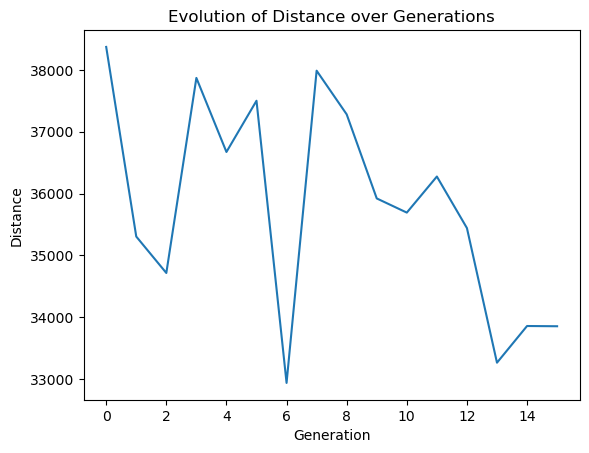

In [ ]:
def genetic_algorithm(problem, generations, population_size, mutation_rate, elitism_size=1, stationary_limit=10):
    cities = list(problem.get_nodes())
    population = initial_population(population_size, cities)
    best_distances = []
    no_improvement_count = 0
    last_best_distance = float('inf')

    for generation in range(generations):
        new_population = []
        gen_best_distance = float('inf')
        # Elitism: Carry the best individuals to the next generation
        elites = sorted(population, key=lambda tour: calculate_distance(tour, problem))[:elitism_size]
        new_population.extend(elites)

        for _ in range((len(population) - elitism_size) // 2):
            parent1 = roulette_wheel_selection(population, lambda tour: fitness(tour, problem))
            parent2 = roulette_wheel_selection(population, lambda tour: fitness(tour, problem))
            
            # Perform uniform crossover
            child1, child2 = uniform_crossover(parent1, parent2)

            # Apply inversion mutation with mutation_rate
            child1 = inversion_mutation(child1, mutation_rate)
            child2 = inversion_mutation(child2, mutation_rate)

            # Add new children to the new population
            new_population.extend([child1, child2])

            for child in [child1, child2]:
                distance = calculate_distance(child, problem)
                if distance < gen_best_distance:
                    gen_best_distance = distance

        # Detecting a stationary state
        if gen_best_distance < last_best_distance:
            last_best_distance = gen_best_distance
            no_improvement_count = 0
        else:
            no_improvement_count += 1
        if no_improvement_count >= stationary_limit:
            print(f"Stationary state reached at generation {generation}")
            break

        population = new_population
        best_distances.append(gen_best_distance)

    best_solution = min(population, key=lambda tour: calculate_distance(tour, problem))

    return best_solution, best_distances

# Example usage
best_tour, best_distances = genetic_algorithm(problem, 100, 50, 0.01)

# Plot the evolution of the best distance
plt.plot(best_distances)
plt.title('Evolution of Distance over Generations')
plt.xlabel('Generation')
plt.ylabel('Distance')
plt.show()